In [3]:
pip install fake-useragent

Processing c:\users\utilisateur\appdata\local\pip\cache\wheels\5e\63\09\d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff\fake_useragent-0.1.11-cp37-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import time
import bs4
import random
import requests
from fake_useragent import UserAgent
import itertools as it

In [5]:
token = 'https://www.seloger.com/list.htm?projects=2&types=1%2C2&natures=1%2C2&places=%5B%7Bci%3A330063%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg='

In [6]:
def get_pages(token, nb):
    pages = []
    for i in range(1,nb+1):
        j = token + str(i)
        pages.append(j)
    return pages

In [14]:
nb_pages = 3

In [15]:
pages = get_pages(token,nb_pages)

<html lang="en"><head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="X-UA-Compatible" content="ie=edge">
  <title>Document</title>
<style data-styled="" data-styled-version="4.2.0">
/* sc-component-id: sc-global-2048341039 */
@font-face{font-family:'Source Sans Pro';font-style:normal;font-weight:400;src:url(data:application/font-woff;charset=utf-8;base64,d09GRgABAAAAAEygABEAAAAAmiAAAQABAAAAAAAAAAAAAAAAAAAAAAAAAABHREVGAAABgAAAADYAAABGA64D2UdQT1MAAAG4AAAIUQAAGWCiWneKR1NVQgAACgwAAAF8AAADIEqWYudPUy8yAAALiAAAAFUAAABgWwyXumNtYXAAAAvgAAAC2AAABpY1kuCUY3Z0IAAADrgAAAAqAAAAKgEiDcpmcGdtAAAO5AAAAPwAAAFzBlmcN2dhc3AAAA/gAAAACAAAAAj//wADZ2x5ZgAAD+gAADP0AABlLEKdNY9oZWFkAABD3AAAADYAAAA2DRC+lWhoZWEAAEQUAAAAIAAAACQKhAbNaG10eAAARDQAAAIBAAAELsvOKIJsb2NhAABGOAAAAhIAAAIaIQcIaG1heHAAAEhMAAAAIAAAACADKwJ6bmFtZQAASGwAAAFBAAACsluRc55wb3N0AABJsAAAApoAAASbCMU9Y3ByZXAAAExMAAAAUwAAAFaaY/2HeNoNw7ENQAAABMB7ncQ6OiMwgVpHS+xtAJ/LCSbAYOxZLBWrTewVR8XpEnf
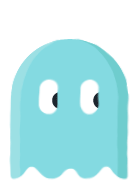

In [16]:
from urllib.request import urlopen
with urlopen("https://www.seloger.com/robots.txt") as stream:
     print(stream.read().decode("utf-8"))

In [17]:
# https://www.proxy-list.download/HTTPS
proxies = pd.read_csv('Proxy List.txt', header = None)
proxies = proxies.values.tolist()
proxies = list(it.chain.from_iterable(proxies))

In [20]:
def get_data(pages,proxies):
    
    df = pd.DataFrame()
    parameters = ['Price__Label-sc-1g9fitq-1 kYWVBR','data-codepostal','data-idagence','data-idannonce','data-nb_chambres','data-nb_pieces','data-surface','data-typebien']
    ua = UserAgent()
    proxy_pool = it.cycle(proxies)
    
    while len(pages) > 0:
        for i in pages:
        # on lit les pages une par une et on initialise une table vide pour ranger les données d'une page     
            df_f = pd.DataFrame()
        # itération dans un liste de proxies    
            proxy = next(proxy_pool)
        # essai d'ouverture d'une page   
            try:
                response = requests.get(i,proxies={"http": proxy, "https": proxy}, headers={'User-Agent': ua.random},timeout=5)
                time.sleep(random.randrange(1,5))
        # lecture du code html et la recherche des balises <em>
                soup = bs4.BeautifulSoup(response.text, 'html.parser')
                em_box = soup.find_all("em", {"class":"agency-website"})
        # extraction des données        
                for par in parameters:
                    l = []
                    for el in em_box:
                        j = el[par]
                        l.append(j)
                    l = pd.DataFrame(l, columns = [par])
                    df_f = pd.concat([df_f,l], axis = 1)
                df = df.append(df_f, ignore_index=True)
                pages.remove(i)
                print(df.shape)
            except:
                print("Skipping. Connnection error")
                
    return df

In [ ]:
data = get_data(pages,proxies)

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnection error
Skipping. Connnectio

In [ ]:
data.to_csv(r'File Name.csv')